In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from matplotlib.pyplot import *
%matplotlib inline
import scipy.stats as scipy
import statsmodels.stats.multitest as multi
 
sns.set_style("ticks")

from IPython.display import set_matplotlib_formats

sys.path.append('/home/felix/jupyter/jupyter_notebooks/functions')

from datetime import datetime, timedelta

In [4]:
import alphafold2_multimer_screen as af2h

In [5]:
candidates = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure6_rnaSeq/candidate_complexes.tsv', sep='\t', names=['target', 'prot_ids', 'species'], skiprows=1)

## C.fulvum processing

In [6]:
cfu = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure6_rnaSeq/GCA_020509005.1_Cfulv_R5_v4_rnaseq_overview.tsv', sep='\t', index_col=0)

In [7]:
cand_cfu = pd.DataFrame()

for i in candidates[candidates.species == 'C_fulvum']['prot_ids'].to_numpy():

    cand_cfu = cand_cfu.append(cfu[cfu.index.str.contains(i)])

In [8]:
cfu_info = []

for i in cand_cfu.index:
    prot = re.search('.+(KAH[0-9]+\.[0-9])_', i).group(1)
    for j in cand_cfu.columns:
        if j not in ['length', 'eff_length']:
            value = cand_cfu.loc[i, j]
            info = re.search('inTomato([0-9]+)dpi_([SRR0-9]+)_(.+)', j)
            dpi = info.group(1)
            sample = info.group(2)
            dtype = info.group(3)
            
            
            cfu_info.append([prot, dtype, value, int(dpi), sample, 'infected', 'tomato'])
cfu_info = pd.DataFrame(cfu_info, columns=['prot_id', 'data_type', 'value', 'dpi', 'sample', 'status', 'tissue']).sort_values(by='dpi')

## F.oxysporum f. sp. lycopersici processing

In [9]:
fox = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure6_rnaSeq/GCF_000149955.1_ASM14995v2_six15added_rnaseq_overview.tsv', sep='\t', index_col=3)
fox.index = fox.index.fillna('unknown')

In [10]:
fox = fox[fox.index != 'unknown']

In [11]:
cand_fox = af2h.subset_candidates(candidates, 'F_oxysporum_f_sp_lycopersici', fox)
cand_fox.drop(columns=['target_id', 'length', 'eff_length'], inplace=True)

In [12]:
fox_info = []

for i in cand_fox.index:
    prot = i

    for j in cand_fox.columns:
        value = cand_fox.loc[i, j]
        info = re.search('([a-zA-Z]+)_(SRR[0-9]+)_([a-z_]+)', j)
        inf = info.group(1)
        sample = info.group(2)
        dtype = info.group(3)
        
        if inf == 'mock':
            fox_info.append([prot, dtype, value, 1, sample, 'mock', 'tomato'])
            
        elif inf == 'FOL':
            fox_info.append([prot, dtype, value, 1, sample, 'infected', 'tomato'])
            
fox_info = pd.DataFrame(fox_info, columns=['prot_id', 'data_type', 'value', 'dpi', 'sample', 'status', 'tissue']).sort_values(by='dpi')    

## R.solanacearum GMI1000

In [16]:
gmi = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure6_rnaSeq/GCF_000009125.1_rnaseq_overview.tsv', sep='\t', index_col=0)
gmi.drop(columns=['length', 'eff_length'], inplace=True)

In [17]:
cand_gmi = af2h.subset_candidates(candidates, 'R_solanacearum_GMI1000', gmi)

In [18]:
gmi_info = []

for i in cand_gmi.index:
    prot = re.search('.+_cds_(WP_[0-9\.]+)_', i).group(1)
    
    for j in cand_gmi.columns:
        value = cand_gmi.loc[i, j]
        info = re.search('(SRR[0-9]+)_([_a-z]+)', j)
        sample = info.group(1)
        dtype = info.group(2)
        
        gmi_info.append([prot, dtype, value, 3, sample, 'infected', 'tomato'])
        
gmi_info = pd.DataFrame(gmi_info, columns=['prot_id', 'data_type', 'value', 'dpi', 'sample', 'status', 'tissue']).sort_values(by='dpi')

## R.solanacearum IBSBF 1504

In [19]:
ibs = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure6_rnaSeq/GCF_001587155.1_ASM158715v1_rnaseq_overview.tsv', sep='\t', index_col=0)
ibs.drop(columns=['length', 'eff_length'], inplace=True)

In [20]:
cand_ibs = af2h.subset_candidates(candidates, 'R_solanacearum_IBSBF_1503', ibs)

In [21]:
ibs_info = []

for i in cand_ibs.index:
    prot = re.search('.+_cds_(WP_[0-9\.]+)_', i).group(1)
    
    for j in cand_ibs.columns:
        value = cand_ibs.loc[i, j]
        info = re.search('(SRR[0-9]+)_([_a-z]+)', j)
        sample = info.group(1)
        dtype = info.group(2)
        
        ibs_info.append([prot, dtype, value, 3, sample, 'infected', 'tomato'])
        
ibs_info = pd.DataFrame(ibs_info, columns=['prot_id', 'data_type', 'value', 'dpi', 'sample', 'status', 'tissue']).sort_values(by='dpi')

## B.cinerea

In [22]:
bci = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure6_rnaSeq/GCF_000143535.2_ASM14353v4_rnaseq_overview.tsv', sep='\t', index_col=3)
bci.drop(columns=['length', 'eff_length', 'target_id'], inplace=True)

In [23]:
cand_bci = af2h.subset_candidates(candidates, 'B_cinerea', bci)

In [24]:
bci_info = []

for i in cand_bci.index:
    prot = i

    for j in cand_bci.columns:
        value = cand_bci.loc[i, j]
        info = re.search('([a-zA-Z]+)_(SRR[0-9]+)_([a-z_]+)', j)
        inf = info.group(1)
        sample = info.group(2)
        dtype = info.group(3)
        
        if inf == 'inVitro':
            bci_info.append([prot, dtype, value, 1.3, sample, 'pathogen', 'inVitro'])
            
        elif inf == 'inTomato':
            bci_info.append([prot, dtype, value, 1, sample, 'infected', 'tomato'])
bci_info = pd.DataFrame(bci_info, columns=['prot_id', 'data_type', 'value', 'dpi', 'sample', 'status', 'tissue']).sort_values(by='dpi')   

## P.syringae pv. tomato DC3000

In [25]:
pto = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure6_rnaSeq/Pseudomonas_syringae_pv_tomato_DC3000_111_rnaseq_overview.tsv', sep='\t', index_col=0)
pto.drop(columns=['length', 'eff_length'], inplace=True)
pto_trans = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure6_rnaSeq/Pseudomonas_syringae_pv_tomato_DC3000_111_id_translation.tsv', sep='\t', names=['rna', 'prot'])

In [26]:
candidates[candidates.species == 'PtoDC3000']['prot_ids'].to_numpy()

array(['PSPTO_0389'], dtype=object)

In [27]:
pto_hits = pto_trans[pto_trans.prot.isin(candidates[candidates.species == 'PtoDC3000']['prot_ids'].to_numpy())]['rna'].to_numpy()

In [28]:
cand_pto = pto.loc[pto.index == pto_hits[0]]

In [29]:
pto_info = []

rep_dic = {'SRR10284966':0,
           'SRR10284967':0,
           'SRR10284968':0,
           'SRR10284969':0,
           'SRR10284973':1,
           'SRR10284977':2,
           'SRR10284978':2
          }



for i in cand_pto.index:
    prot = i
    
    reps_est = [[], [], []]
    reps_tpm = [[], [], []]
    
    for j in cand_pto.columns:
        value = cand_pto.loc[i,j]
        
        info = re.search('(SRR[0-9]+)_([a-z_]+)', j)
        sample = info.group(1)
        dtype = info.group(2)
                
        if dtype == 'est_counts':
            reps_est[rep_dic[sample]].append(value)
            
        elif dtype == 'tpm':
            reps_tpm[rep_dic[sample]].append(value)
            
        else:
            print("ERROR - data type off")
            
            
    if prot == 'PGD1834627':
        prot = 'PSPTO_0389'
            
    for counter in range(0, 3):
        pto_info.append([prot, 'est_counts', np.mean(reps_est[counter]), 2, 'X', 'infected', 'Arabidopsis'])
        pto_info.append([prot, 'tpm', np.mean(reps_tpm[counter]), 2, 'X', 'infected', 'Arabidopsis'])
        
pto_info = pd.DataFrame(pto_info, columns=['prot_id', 'data_type', 'value', 'dpi', 'sample', 'status', 'tissue']).sort_values(by='dpi')   

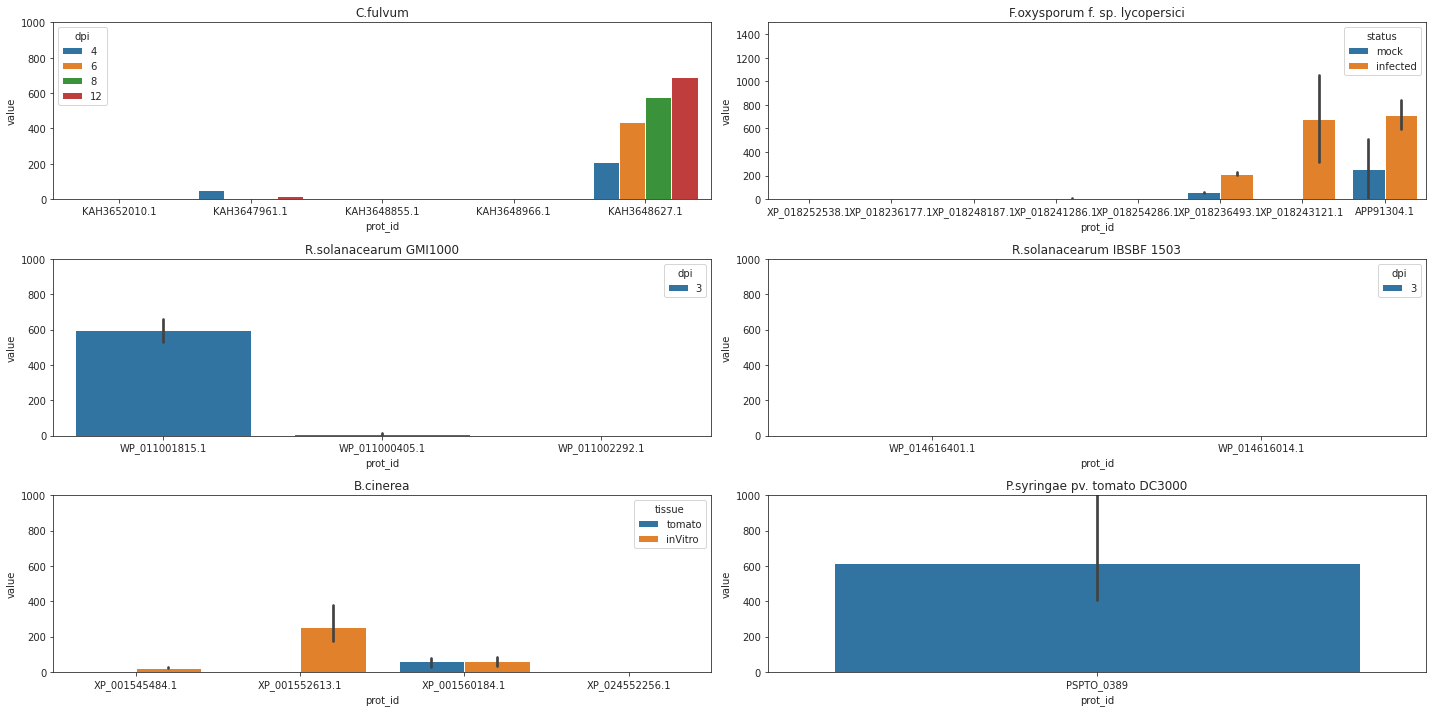

In [31]:
fig, axes = plt.subplots(3, 2, figsize=(20, 10))

sns.barplot(data=cfu_info[cfu_info.data_type == 'tpm'], x='prot_id', y='value', hue='dpi', ax=axes[0,0]).set(title='C.fulvum', ylim=(0, 1000))
sns.barplot(data=fox_info[fox_info.data_type == 'tpm'], x='prot_id', y='value', hue='status', hue_order=['mock', 'infected'], ax=axes[0,1]).set(title='F.oxysporum f. sp. lycopersici', ylim=(0, 1500))
sns.barplot(data=gmi_info[gmi_info.data_type == 'tpm'], x='prot_id', y='value', hue='dpi', ax=axes[1,0]).set(title="R.solanacearum GMI1000", ylim=(0, 1000))
sns.barplot(data=ibs_info[ibs_info.data_type == 'tpm'], x='prot_id', y='value', hue='dpi', ax=axes[1,1]).set(title="R.solanacearum IBSBF 1503", ylim=(0, 1000))
sns.barplot(data=bci_info[(bci_info.data_type == 'tpm')], x='prot_id', y='value', hue='tissue', ax=axes[2,0]).set(title='B.cinerea', ylim=(0, 1000))
sns.barplot(data=pto_info[pto_info.data_type == 'tpm'], x='prot_id', y='value', ax=axes[2,1]).set(title='P.syringae pv. tomato DC3000', ylim=(0, 1000))


plt.tight_layout()
plt.show()

## Make empty df for X.perforans

In [32]:
xpe_info = []

for xant in candidates[candidates.species == 'X_perforans'].prot_ids:
    xpe_info.append([xant, 'est_counts', None, None, 'X', 'X', 'X'])
    xpe_info.append([xant, 'tpm', None, None, 'X', 'X', 'X'])
    
xpe_info = pd.DataFrame(xpe_info, columns = cfu_info.columns)

In [33]:
over = [pto_info, xpe_info, gmi_info, ibs_info, bci_info, fox_info, cfu_info]
spec = ['P.syringae pv. tomato DC3000', 'X.perforans', 'R.solanacearum GMI1000', 'R.solanacearum IBSBF1503', 'B.cinerea', 'F.oxysporum f. sp. lycopersici', 'C.fulvum']

In [34]:
for counter, (df, species) in enumerate(zip(over, spec)):
    
    tmp = df.copy()
    tmp['species'] = species
    
    if counter == 0:
        new = tmp
        
    else:
        new = new.append(tmp, ignore_index=True)
        
rnaseq = new

In [35]:
hue_order = ['P.syringae pv. tomato DC3000', 'X.perforans', 'R.solanacearum GMI1000', 'R.solanacearum IBSBF1503', 'B.cinerea', 'F.oxysporum f. sp. lycopersici', 'C.fulvum']

In [36]:
candidates.replace({"prot_id": {'PGD1834627':'PSPTO_0389'}}, inplace=True)

In [37]:
rnaseq['target'] = 'empty'

for i in np.unique(rnaseq.prot_id.to_numpy()):
    target = candidates[candidates.prot_ids == i].target.to_numpy()[0]
    rnaseq.loc[rnaseq.prot_id == i, 'target'] = target

In [38]:
rnaseq_show = rnaseq[(rnaseq.data_type == 'tpm') & (rnaseq.status != 'mock') & (rnaseq.tissue != 'inVitro')].sort_values(by=['target', 'value'])
rnaseq_show['prot_id'] = [x.replace('_', '') for x in rnaseq_show.prot_id.values]
rnaseq_show.index = range(len(rnaseq_show))

In [39]:
msa_eff = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure5_Orthofinder_overview/mean_msa_depth_for_effectors.tsv', sep='\t')
msa_cand = msa_eff[msa_eff.Protein.isin(rnaseq_show.prot_id.values)]

In [40]:
rnaseq_show['mean_non_gap_coverage'] = 0

for i in np.unique(rnaseq_show.prot_id.values):
    cov = msa_cand.loc[msa_cand.Protein == i, 'mean_non_gap_coverage'].values[0]
    rnaseq_show.loc[rnaseq_show.prot_id == i, 'mean_non_gap_coverage'] = cov

In [41]:
rnaseq_found = rnaseq_show[rnaseq_show.value >= 0].sort_values(by='value')

In [42]:
rnaseq_nodat = rnaseq_show[rnaseq_show.value.isna()].sort_values(by='mean_non_gap_coverage')

In [43]:
id_order = rnaseq_show['prot_id'].to_numpy() 
_, idx = np.unique(id_order, return_index=True)
id_order = id_order[np.sort(idx)]

In [44]:
id_order = []

In [64]:
#rnaseq_show.to_csv('/home/felix/thesis/chapter5_AF2H/figure4_PredSec_Screen_candidates/rnaseq_msa_depth_data_six15added.tsv', sep='\t', index=None)

In [45]:
rnaseq_order = ['KAH3648966.1', 'KAH3652010.1', 'KAH3648855.1', 'XP018236177.1', 'XP018252538.1', 'XP024552256.1', 'WP014616014.1', 'WP014616401.1', 'XP001552613.1', 'XP018254286.1', 'XP001545484.1', 'WP011002292.1', 'XP018241286.1', 'XP018248187.1', 'WP011000405.1', 'KAH3647961.1', 'XP001560184.1', 'XP018236493.1', 'KAH3648627.1', 'XP018243121.1', 'PSPTO0389', 'WP011001815.1', 'APP91304.1', 'WP008576433.1', 'WP008572913.1', 'WP046931881.1', 'WP046932418.1']

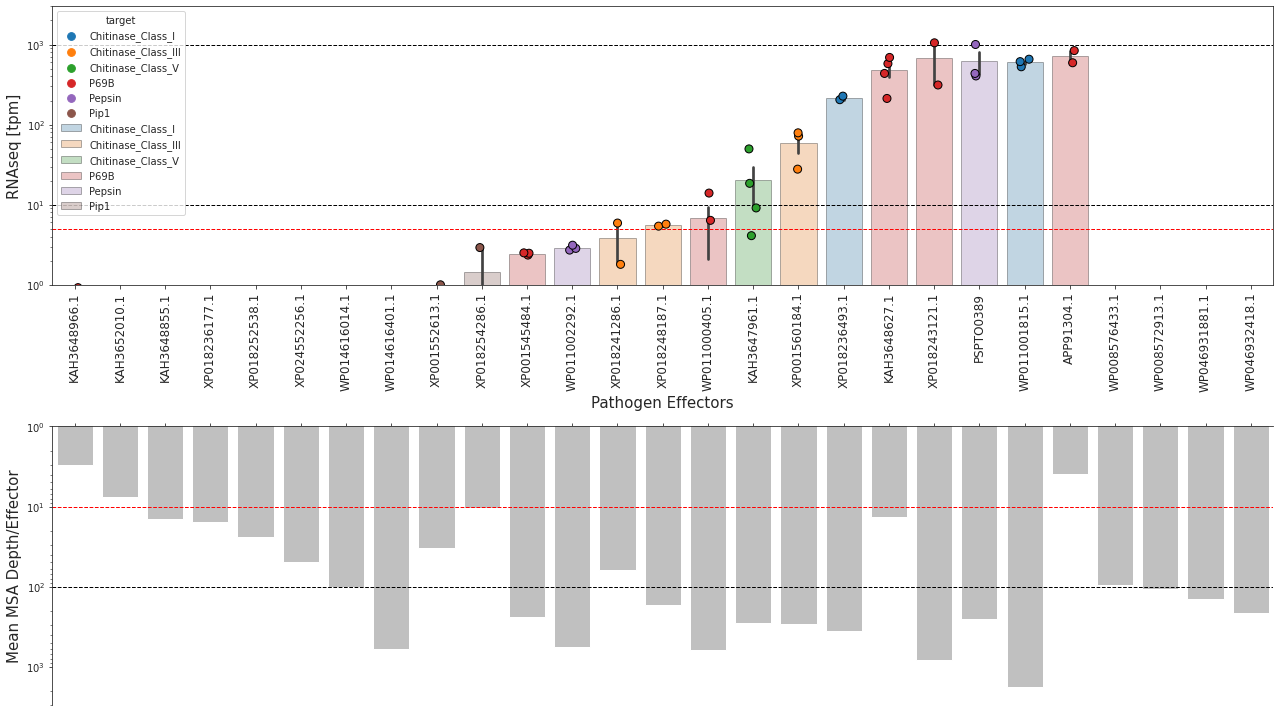

In [46]:
plt.figure(figsize=(35, 10))

rna = plt.subplot2grid((2, 2), (0, 0))
msa = plt.subplot2grid((2, 2), (1, 0))

# Plot RNAseq coverage of candidate effectors
rna.set_yscale('log')
rna.set_ylim(1, 3000)

sns.barplot(data=rnaseq_show, x='prot_id' ,y='value', hue='target', edgecolor='black', order=rnaseq_order, linewidth=1, ci=68, alpha=0.3, dodge=False, ax=rna)
sns.stripplot(data=rnaseq_show, x='prot_id' ,y='value', hue='target', edgecolor='black', order=rnaseq_order, linewidth=1, s=8, dodge=False, ax=rna)

rna.tick_params(axis='x', rotation=90, labelsize=12)
rna.set_xlabel('Pathogen Effectors', fontsize=15)
rna.set_ylabel('RNAseq [tpm]', fontsize=15)
rna.axhline(5, ls='--',lw=1, color='red')
rna.axhline(10, ls='--',lw=1, color='black')
rna.axhline(1000, ls='--',lw=1, color='black')



# Plot MSA depth of candidate effectors
msa.set_yscale('log')
msa.set_ylim(1, 3000)

sns.barplot(data=rnaseq_show, x='prot_id', y='mean_non_gap_coverage', color='silver', order=rnaseq_order, ax=msa)
msa.tick_params(axis='x', rotation=90, labelsize=9)


msa.xaxis.tick_top()
msa.invert_yaxis()
msa.set_xlabel('')
msa.set_ylabel('Mean MSA Depth/Effector', fontsize=15)
msa.set_xticklabels('')
msa.axhline(10, ls='--',lw=1, color='red')
msa.axhline(100, ls='--',lw=1, color='black')
msa.spines['bottom'].set_visible(False)
msa.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()